# 02. 사이킷런으로 시작하는 머신러닝

## 1. 사이킷런 소개와 특징

- 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공

## 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

In [45]:
from sklearn.datasets import load_iris  # 붓꽃 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier  # 사용할 ML 알고리즘 (의사 결정 트리)
from sklearn.model_selection import train_test_split  # 데이터 세트를 학습 데이터와 테스트 데이터로 분리

In [46]:
import pandas as pd  # 0이 Setosa 품종, 1이 versicolor 품종, 2가 virginica 품종

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**학습용 데이터와 테스트용 데이터를 분리**

In [47]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size = 0.2, random_state = 11)
# X_train : 학습용 피처 데이터 세트
# X_test : 테스트용 피처 데이터 세트
# y_train : 학습용 레이블 데이터 세트
# y_test : 테스트용 레이블 데이터 세트

- 첫 번째 파라미터 -> 피처 데이터 세트  
- 두 번째 파라미터 -> 레이블 데이터 세트  
- test_size -> 전체 데이터 세트 중 테스트 데이터 세트의 비율  
- random_state -> 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값  
cf) random_state를 지정하지 않으면?  
수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있음

In [48]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)  # 객체 생성 시 입력된 random_state=11 역시 예제 코드를 수행할 때마다
                                                  # 동일한 학습/예측 결과를 출력하기 위한 용도로 사용

In [49]:
# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [50]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행.
pred = dt_clf.predict(X_test)  # 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 함

In [51]:
from sklearn.metrics import accuracy_score  # 머신러닝 모델의 성능 평가 방법 中 정확도 측정
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


1. **데이터 세트 분리** : 데이터를 학습 데이터와 테스트 데이터로 분리
2. **모델 학습** : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습
3. **예측 수행** : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4. **평가** : 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능 평가

## 3. 사이킷런의 기반 프레임워크 익히기

### Estimator 이해 및 fit(), predict() 메서드

- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭
- 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공
- 이를 합쳐서 Estimator 클래스라고 부름
  
- cross_val_score() 와 같은 evaluation 함수, GridSearchCV 와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 Estimator를 인자로 받음


cf) 비지도학습과 피처 추출에서 fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업  
이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행  
사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공

### 사이킷런의 주요 모듈

1) **예제 데이터**  
sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트  
2) **피처 처리**  
sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공 (문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)  
sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공  
sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨  
3) **피처 처리 & 차원 축소**  
sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능 수행  
4) **데이터 분리, 검증 & 파라미터 튜닝**  
sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출 등의 API 제공  
5) **평가**
sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공 (Accuracy, Precision, Recall 등)  
6) **ML 알고리즘**
sklearn.ensemble : 앙상블 알고리즘 제공. 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공  
sklearn.linear_model : 주로 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. SGD 관련 알고리즘 제공  
sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB  
sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN  
sklearn.svm : 서포트 벡터 머신 알고리즘 제공  
sklearn.tree : 의사 결정 트리 알고리즘 제공  
sklearn.cluster : 비지도 클러스터링 알고리즘 제공 (K-평균, 계층형, DBSCAN)  
7) **유틸리티**  
sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

### 내장된 예제 데이터 세트

**분류나 회귀 연습용 예제 데이터**

1) datasets.load_boston() : 회귀 용도로, 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
2) datasets.load_breast_cancer() : 분류 용도로, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
3) datasets.load_diabetes() : 회귀 용도로, 당뇨 데이터 세트
4) datasets.load_digits() : 분류 용도로, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
5) datasets.load_iris() : 분류 용도로, 붓꽃에 대한 피처를 가진 데이터 세트

cf) fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장돼 있지 않고, 인터넷에 내려받아 홈 디렉터리 아래의 scikit_learn_data라는  
서브 디렉터리에 저장한 후 불러들이는 데이터

**분류와 클러스터링을 위한 표본 데이터 생성기**

1. datasets.make_classifications() : 분류를 위한 데이터 세트를 만듦. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
2. datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트 생성

In [52]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))  # Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils._bunch.Bunch'>


In [53]:
keys = iris_data.keys()  # 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터 값을 추출하기 위해서 '데이터 세트.data' 이용
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [54]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print(' feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:', type(iris_data.data))
print(' data 의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:', type(iris_data.target))
print(' target 의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]

## 4. Model Selection 모듈 소개

- 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가,  
그리고 Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

### 학습/테스트 데이터 세트 분리 - train_test_split()

In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()  # 테스트 데이터 세트를 이용하지 않고, 학습 데이터 세트로만 학습하고 예측
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))  # 정확도가 100%, 이미 학습한 학습 데이터 세트를 기반으로 예측

예측 정확도: 1.0


cf) **train_test_split() 의 파라미터**  
test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정  
train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정  
shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정  
random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값  
train_test_split() 의 반환값은 튜플 형태

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.3, random_state=121)

In [57]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


### 교차 검증

- 오버피팅 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
- 교차 검증 : 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
- 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스

**K 폴드 교차 검증**

- 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [59]:
n_iter = 0  # 반복횟수를 0으로 초기화

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)  # 소수점 넷째자리까지 표기 (반올림)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)  # 교차 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있음
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


**Stratified K 폴드**

- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결

In [60]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [61]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]  # iloc[] 연산자 : 위치 기반 인덱싱 (행과 열 위치)
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))  # 첫 번째 교차 검증 : 학습 레이블의 1, 2 값 추출 + 검증 레이블의 0 값 추츨
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())  # 이는 0의 경우는 전혀 학습을 못함
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


In [62]:
from sklearn.model_selection import StratifiedKFold  # 학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [63]:
dt_dif = DecisionTreeClassifier(random_state=156)
# Stratified K 폴드의 경우 왜곡된 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증을 해야 함
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StraitifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred =dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


**교차 검증을 보다 간편하게 - cross_val_score()**

- 사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공
- 폴드 세트 설정 -> for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출 -> 반복적으로 학습과 예측 수행 및 예측 성능 반환
- estimator : Classifier 또는 Regressor를 의미
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표 기술
- cv : 교차 검증 폴드 수

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)  # cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환
print('교차 검증별 정확도', np.round(scores, 4))  # 내부적으로 StratifiedKFold 를 이용
print('평균 검증 정확도', np.round(np.mean(scores), 4))

교차 검증별 정확도 [0.98 0.94 0.98]
평균 검증 정확도 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소, 이 값을 조정해 알고리즘의 예측 성능 개선
- 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해줌
- 하지만 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념해야 함

In [65]:
grid_parameters = {'max_depth': [1,2,3],
                  'min_samples_split': [2,3]
                  }  # 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실해앟면서 최적의 파라미터와 수행 결과를 도출

**파라미터**  
- estimator : classifier, regressor, pipeline이 사용될 수 있음
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
- scoring : 예측 성능을 측정할 평가 방법 지정
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- refit : True(디폴트)로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴

In [66]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [67]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 결정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]
# rank_test_score 칼럼 값이 1 : 평가한 결과 예측 성능이 1위라는 의미

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [68]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [69]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
# 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는
# 것이 일반적인 머신러닝 모델 적용 방법임

테스트 데이터 세트 정확도: 0.9667


## 5. 데이터 전처리

- 결손값, 즉 NaN, Null 값은 허용되지 않는다.
- Null 값은 고정된 다른 값으로 변환해야 함.
- 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체 가능
- 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 좋음
- Null 값이 일정 수준 이상 되는 경우 결정이 힘듦

- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음
- 카테고리형 피처는 코드 값으로 표현
- 텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제

**데이터 인코딩 - 레이블 인코딩(Label encoding)**

- 카테고리 피처를 코드형 숫자 값으로 변환하는 것

In [70]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [71]:
print('인코딩 클래스:', encoder.classes_) # 데이터가 큰 경우 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 없음

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [72]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성느이 떨어지는 경우 발생
- 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문
- 이러한 특성으로 인해 레이블 인코딩은 **선형 회귀**와 같은 ML 알고리즘에는 적용하지 않아야 함

**데이터 인코딩 - 원-핫 인코딩(One-Hot Encoding)**

- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고, 나머지 칼럼에는 0을 표시하는 방식
- 원-핫 (여러 개의 속성 중 단 한 개의 속성만 1로 표시)
- 입력값으로 2차원 데이터가 필요
- OneHotEncoder를 이용해 변환한 값이 희소 행렬(Sparse Matrix) 형태
- toarray() 메서드를 이용해 밀집 행렬(Dense Matrix)로 변환

In [73]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환합니다.
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())  # 8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [74]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)  # 원-핫 인코딩을 더 쉽게 지원하는 API (판다스)
# 숫자형 값으로 변환 없이도 바로 변환 가능

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


**피처 스케일링과 정규화**

- 표준화(Standardization)  
$$ x_{i}\text{_new} = \frac{{x_i - \text{mean}(x)}}{{\text{stdev}(x)}} $$
평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것

- 정규화(Normalization)  
$$ x_i\text{_new} = \frac{{x_i - \text{min}(x)}}{{\text{max}(x) - \text{min}(x)}} $$
서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념  
모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것

- (사이킷런) 정규화  
$$ x_i\text{_new} = \frac{x_i}{{\sqrt {x_i^2 +y_i^2 +z_i^2}}} $$  
개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미. 개별 벡터를 모든 피처 벡터의 크기로 나누는 것

### StandardScaler

In [75]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [76]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)  # 스케일 변환된 데이터 세트가 넘파이 ndarry

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler

In [77]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())  # 모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고,  
학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 함

In [78]:
# 테스트 데이터에 fit()을 적용할 때 발생하는 문제
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transfrom()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

In [79]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [80]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))
# 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음
# 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [81]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


cf) fit_transform()은 학습 데이터에서는 상관없지만, 테스트 데이터에서는 절대 사용해서는 안 된다

## 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [83]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())  # 로딩된 데이터 칼럼 타입 확인


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [84]:
# 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 fillna() 함수를 사용해 Null 값을 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [85]:
# 문자열 피처들의 값 분류
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

# Cabin의 경우 여러 Cabin이 한꺼번에 표기된 Cabin 값 4건 존재

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 : 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [86]:
# Cabin의 경우 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [87]:
# 성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

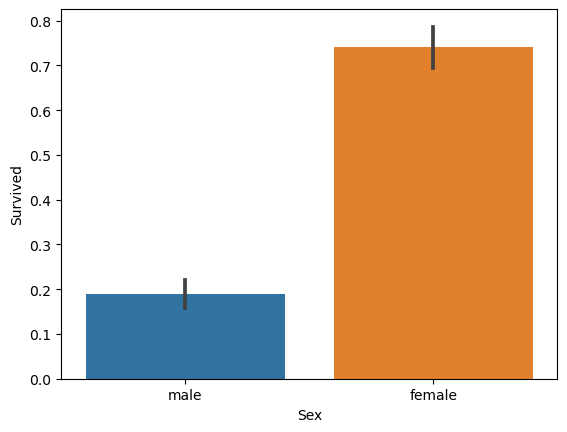

In [89]:
# 시본(Seaborn) 패키지
# 기본적으로 맷플롯립에 기반하고 있지만, 좀 더 세련된 비주얼과 쉬운 API, 편리한 판다스 DataFrame과의 연동
sns.barplot(x='Sex', y='Survived', data=titanic_df)
# x축에 'Sex' 칼럼, y축에 'Survived' 칼럼

<Axes: xlabel='Pclass', ylabel='Survived'>

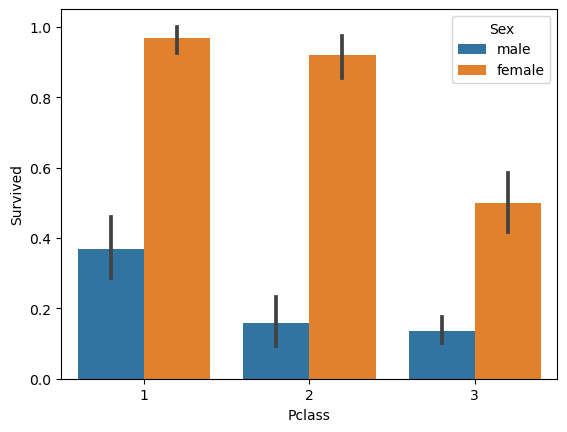

In [90]:
# 부자와 가난한 사람 간의 생존 확률 -> 객실 등급으로 판단
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

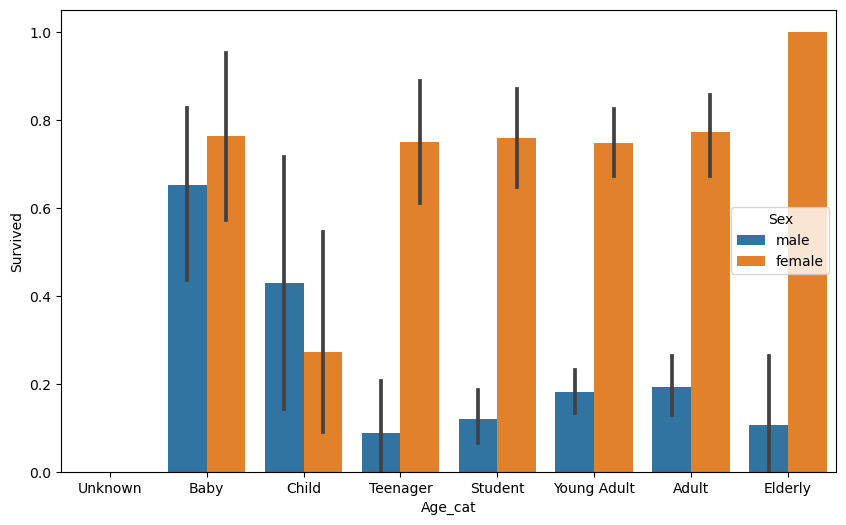

In [92]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True) # 다시 'Age_cat' 칼럼을 삭제후 원본 데이터에 적용

In [93]:
# 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
from sklearn.preprocessing import LabelEncoder
# LabelEncoder 객체는 카테고리 값의 유형 수에 따라 0 ~ (카테고리 유형 수-1) 까지의 숫자 값으로 변환
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [94]:
# transform_features() : Null 처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수로 구성 (데이터의 전처리를 전체적으로 호출)
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [95]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [101]:
### 교차 검증으로 결정 트리 모델을 평가
# KFold 클래스 이용
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # kFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
        # 5개 fold에서의 평균 정확도 계산
        mean_score = np.mean(scores)
        print("평균 정확도 : {0:.4f}".format(mean_score))
#exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
평균 정확도 : 0.7542
교차 검증 1 정확도: 0.7809
평균 정확도 : 0.7675
교차 검증 2 정확도: 0.7865
평균 정확도 : 0.7739
교차 검증 3 정확도: 0.7697
평균 정확도 : 0.7728
교차 검증 4 정확도: 0.8202
평균 정확도 : 0.7823


In [102]:
# cross_val_score() 이용
# cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879


In [104]:
# GridSearchCV 이용
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSEarchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DeicisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DeicisionTreeClassifier 정확도 : 0.8715
